# import

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import graphviz
from sklearn import datasets
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier
from matplotlib.pyplot import figure

In [29]:
path = r'/Users/rabito/Desktop/Rabito Docs/Documents/Career Foundry/Specialization'

In [31]:
climate = pd.read_csv(os.path.join(path,'Project ClimateWins','Cleaned Data','weather_scaled.csv'), index_col = 0)

In [32]:
answers = pd.read_csv(os.path.join(path,'1.4 Supervised Learning Algorithms Part 1','Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

# work

In [36]:
climate.shape

(22950, 171)

In [38]:
climate.head()

,id,date,month,basel_cloud_cover,basel_wind_speed,basel_humidity,basel_pressure,basel_global_radiation,basel_precipitation,basel_snow_depth,...,valentia_cloud_cover,valentia_humidity,valentia_pressure,valentia_global_radiation,valentia_precipitation,valentia_snow_depth,valentia_sunshine,valentia_temp_mean,valentia_temp_min,valentia_temp_max
0,0,19600101,1,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,...,-0.443701,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237
1,1,19600102,1,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,-0.179228,...,0.783085,1.183580,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141
2,2,19600103,1,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,-0.179228,...,0.783085,1.183580,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078
3,3,19600104,1,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,-0.179228,...,0.783085,0.480538,0.387574,-1.183432,0.669056,-0.024706,-1.039536,-0.998679,-0.164486,-0.838511
4,4,19600105,1,0.244897,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,-0.179228,...,-1.670486,-0.363113,1.729970,-0.794645,-0.490810,-0.024706,0.672505,-1.509396,-1.339569,-1.471186


#map each iris species number to a name with a dictionary.
iris_class = {0:'Iris-setosa', 1:'Iris-versicolor', 2:'Iris-virginica'}
df_iris['Species'] = [iris_class[i] for i in df_iris.Species]

In [41]:
print(climate.columns.tolist())

['id', 'date', 'month', 'basel_cloud_cover', 'basel_wind_speed', 'basel_humidity', 'basel_pressure', 'basel_global_radiation', 'basel_precipitation', 'basel_snow_depth', 'basel_sunshine', 'basel_temp_mean', 'basel_temp_min', 'basel_temp_max', 'belgrade_cloud_cover', 'belgrade_humidity', 'belgrade_pressure', 'belgrade_global_radiation', 'belgrade_precipitation', 'belgrade_sunshine', 'belgrade_temp_mean', 'belgrade_temp_min', 'belgrade_temp_max', 'budapest_cloud_cover', 'budapest_humidity', 'budapest_pressure', 'budapest_global_radiation', 'budapest_precipitation', 'budapest_sunshine', 'budapest_temp_mean', 'budapest_temp_min', 'budapest_temp_max', 'debilt_cloud_cover', 'debilt_wind_speed', 'debilt_humidity', 'debilt_pressure', 'debilt_global_radiation', 'debilt_precipitation', 'debilt_sunshine', 'debilt_temp_mean', 'debilt_temp_min', 'debilt_temp_max', 'dusseldorf_cloud_cover', 'dusseldorf_wind_speed', 'dusseldorf_humidity', 'dusseldorf_pressure', 'dusseldorf_global_radiation', 'dusseld

In [43]:
climate.drop(['id','date', 'month','roma_cloud_cover', 'roma_wind_speed', 'roma_humidity', 'roma_pressure', 'roma_sunshine', 'roma_temp_mean', 'tours_wind_speed', 'tours_humidity', 'tours_pressure', 'tours_global_radiation', 'tours_precipitation', 'tours_temp_mean', 'tours_temp_min', 'tours_temp_max','gdansk_cloud_cover', 'gdansk_humidity', 'gdansk_precipitation', 'gdansk_snow_depth', 'gdansk_temp_mean', 'gdansk_temp_min', 'gdansk_temp_max'], axis=1)

,basel_cloud_cover,basel_wind_speed,basel_humidity,basel_pressure,basel_global_radiation,basel_precipitation,basel_snow_depth,basel_sunshine,basel_temp_mean,basel_temp_min,...,valentia_cloud_cover,valentia_humidity,valentia_pressure,valentia_global_radiation,valentia_precipitation,valentia_snow_depth,valentia_sunshine,valentia_temp_mean,valentia_temp_min,valentia_temp_max
0,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,-0.902918,-0.528623,-0.845652,...,-0.443701,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237
1,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,-0.179228,-0.810126,-0.582946,-0.462450,...,0.783085,1.183580,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141
2,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,-0.179228,-1.065304,-0.257010,-0.186545,...,0.783085,1.183580,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078
3,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,-0.179228,-0.114186,-0.555784,-0.385810,...,0.783085,0.480538,0.387574,-1.183432,0.669056,-0.024706,-1.039536,-0.998679,-0.164486,-0.838511
4,0.244897,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,-0.179228,0.187388,-1.003946,-1.075573,...,-1.670486,-0.363113,1.729970,-0.794645,-0.490810,-0.024706,0.672505,-1.509396,-1.339569,-1.471186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,-1.833187,-0.02793,0.284075,1.037367,-0.005632,-0.004619,-0.179228,0.720943,0.747959,0.779123,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530
22946,0.244897,-0.02793,0.103401,0.976231,-0.005632,-0.004619,-0.179228,0.187388,0.856604,1.223637,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530
22947,-0.586336,-0.02793,0.013064,0.716402,-0.005632,-0.004619,-0.179228,0.349774,0.856604,1.039701,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530
22948,-0.170720,-0.02793,0.374412,0.487141,-0.005632,-0.004619,-0.179228,0.280180,0.680055,0.809780,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530


In [45]:
#reduce to just the temperature variables (excluding gdansk, roma,tours)
climate = climate[['basel_temp_mean','belgrade_temp_mean',
 'budapest_temp_mean','debilt_temp_mean','dusseldorf_temp_mean',
 'heathrow_temp_mean',
 'kassel_temp_mean',
 'ljubljana_temp_mean',
 'maastricht_temp_mean',
 'madrid_temp_mean',
 'munchenb_temp_mean',
 'oslo_temp_mean',
 'sonnblick_temp_mean',  
 'stockholm_temp_mean',
 'valentia_temp_mean',]].copy()

In [47]:
columns_to_drop = ['DATE']
columns_to_drop = [col for col in columns_to_drop if col in answers.columns]
answers.drop(columns=columns_to_drop, inplace=True)

In [49]:
answers.head()

,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [51]:
answers.columns = answers.columns.str.lower()

In [53]:
climate.head()

,basel_temp_mean,belgrade_temp_mean,budapest_temp_mean,debilt_temp_mean,dusseldorf_temp_mean,heathrow_temp_mean,kassel_temp_mean,ljubljana_temp_mean,maastricht_temp_mean,madrid_temp_mean,munchenb_temp_mean,oslo_temp_mean,sonnblick_temp_mean,stockholm_temp_mean,valentia_temp_mean
0,-0.528623,-1.016876,-1.099163,-0.114356,-0.105836,-0.106469,-0.182904,-1.370824,-0.097084,-0.988280,-0.265742,-0.186575,-0.124331,-0.391072,-0.668215
1,-0.582946,-1.107669,-1.110927,-0.367511,-0.370915,-0.892676,-0.212437,-1.043881,-0.232112,-0.691740,-0.353714,-0.368598,-0.650834,-0.415953,-0.548046
2,-0.257010,-1.084971,-1.063873,-0.509912,-0.532908,-0.490837,-0.389635,-0.741156,-0.487164,-0.853490,-0.403983,-0.550620,-0.650834,-0.615003,-0.067372
3,-0.555784,-1.209812,-1.146217,-0.525734,-0.577088,-0.316124,-0.493001,-0.910682,-0.472161,-0.624345,-0.642763,-0.417137,-0.943336,-0.764290,-0.998679
4,-1.003946,-1.209812,-1.087400,-0.320045,-0.444548,-0.403481,-0.552067,-0.862246,-0.307127,-0.381721,-0.906678,-0.332193,-0.621584,-0.503037,-1.509396


In [55]:
X = climate
y = answers

In [57]:
print(X.shape)
print(y.shape)

(22950, 15)
(22950, 15)


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [61]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 15)
(5738, 15)
(17212, 15)
(5738, 15)


# Decision Tree

[Text(0.37905082612779034, 0.9848484848484849, 'x[8] <= 0.376\ngini = 0.316\nsamples = 17212\nvalue = [[12948, 4264]\n[11182, 6030]\n[11619, 5593]\n[13854, 3358]\n[13509, 3703]\n[13421, 3791]\n[14361, 2851]\n[12379, 4833]\n[13622, 3590]\n[9535, 7677]\n[13637, 3575]\n[14492, 2720]\n[17212, 0]\n[14290, 2922]\n[16314, 898]]'),
 Text(0.11528963625533492, 0.9545454545454546, 'x[9] <= -0.281\ngini = 0.1\nsamples = 10533\nvalue = [[9904, 629]\n[8963, 1570]\n[9386, 1147]\n[10387, 146]\n[10252, 281]\n[9925, 608]\n[10372, 161]\n[9675, 858]\n[10371, 162]\n[8015, 2518]\n[10179, 354]\n[10307, 226]\n[10533, 0]\n[10323, 210]\n[10376, 157]]'),
 Text(0.050746648783959264, 0.9242424242424242, 'x[2] <= 0.13\ngini = 0.036\nsamples = 7471\nvalue = [[7332, 139]\n[6811, 660]\n[7118, 353]\n[7426, 45]\n[7390, 81]\n[7407, 64]\n[7409, 62]\n[7243, 228]\n[7418, 53]\n[7252, 219]\n[7318, 153]\n[7435, 36]\n[7471, 0]\n[7438, 33]\n[7459, 12]]'),
 Text(0.028911489865020363, 0.8939393939393939, 'x[1] <= -0.069\ngini = 0.

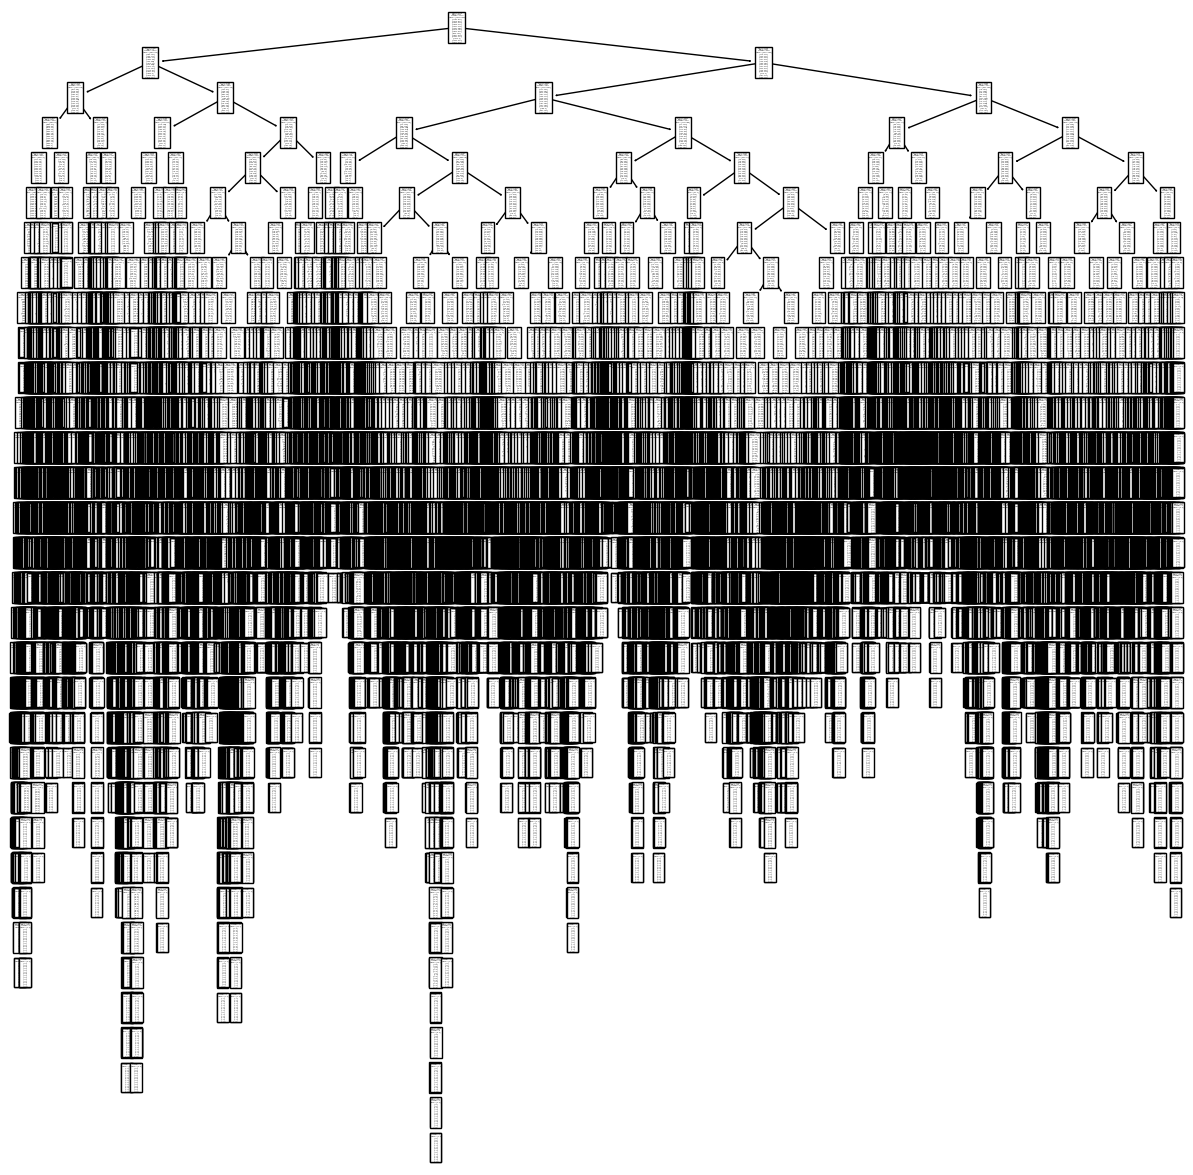

In [69]:
climate_dt = DecisionTreeClassifier(criterion='gini', min_samples_split=2)
climate_dt.fit(X_train, y_train)
figure(figsize=(15,15))
tree.plot_tree(climate_dt)
dlimate_dt

In [54]:
y_pred_train = climate_dt.predict(X_train)
print('Train accuracy score: ',cross_val_score(climate_dt, X_train, y_train, cv = 3, scoring='accuracy').mean())

Train accuracy score:  0.4001858790001507


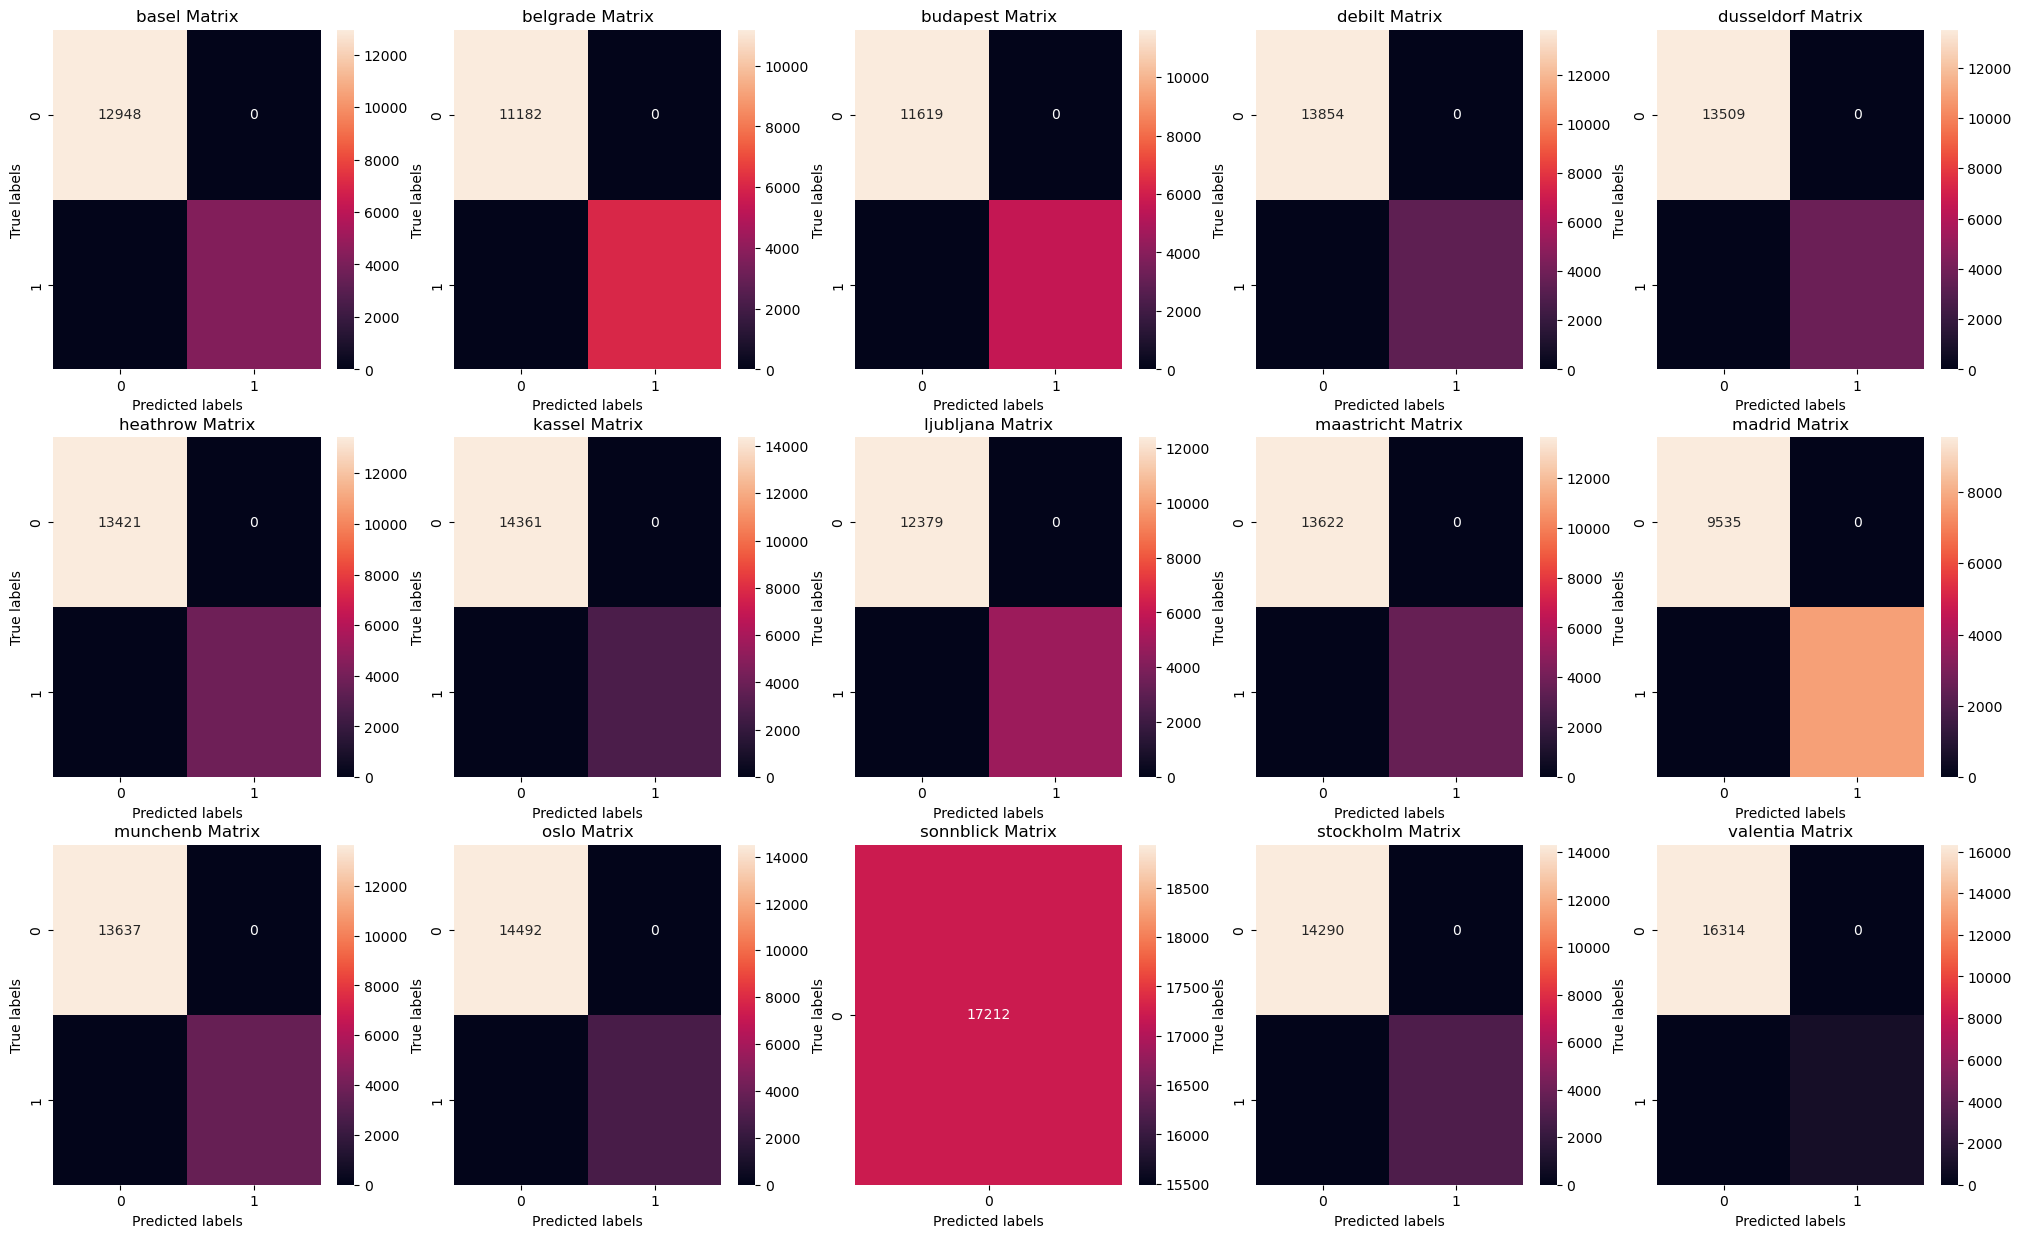

In [61]:
#Confusion matrix based on the last "k" in the sequence (Training data)
locations = list({x.split("_")[0] for x in climate.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred_train[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        count+=1

In [66]:
y_test_pred = climate_dt.predict(X_test)
print('Test accuracy score: ',accuracy_score(y_test, y_test_pred))
multilabel_confusion_matrix(y_test, y_test_pred)

Test accuracy score:  0.4022307424189613


array([[[3737,  601],
        [ 560,  840]],

       [[3124,  652],
        [ 607, 1355]],

       [[3333,  567],
        [ 576, 1262]],

       [[4135,  502],
        [ 450,  651]],

       [[3957,  550],
        [ 551,  680]],

       [[3967,  603],
        [ 553,  615]],

       [[4399,  416],
        [ 394,  529]],

       [[3547,  648],
        [ 574,  969]],

       [[4058,  504],
        [ 506,  670]],

       [[2670,  498],
        [ 524, 2046]],

       [[4031,  515],
        [ 509,  683]],

       [[4480,  399],
        [ 374,  485]],

       [[5738,    0],
        [   0,    0]],

       [[4388,  378],
        [ 368,  604]],

       [[5238,  224],
        [ 207,   69]]])

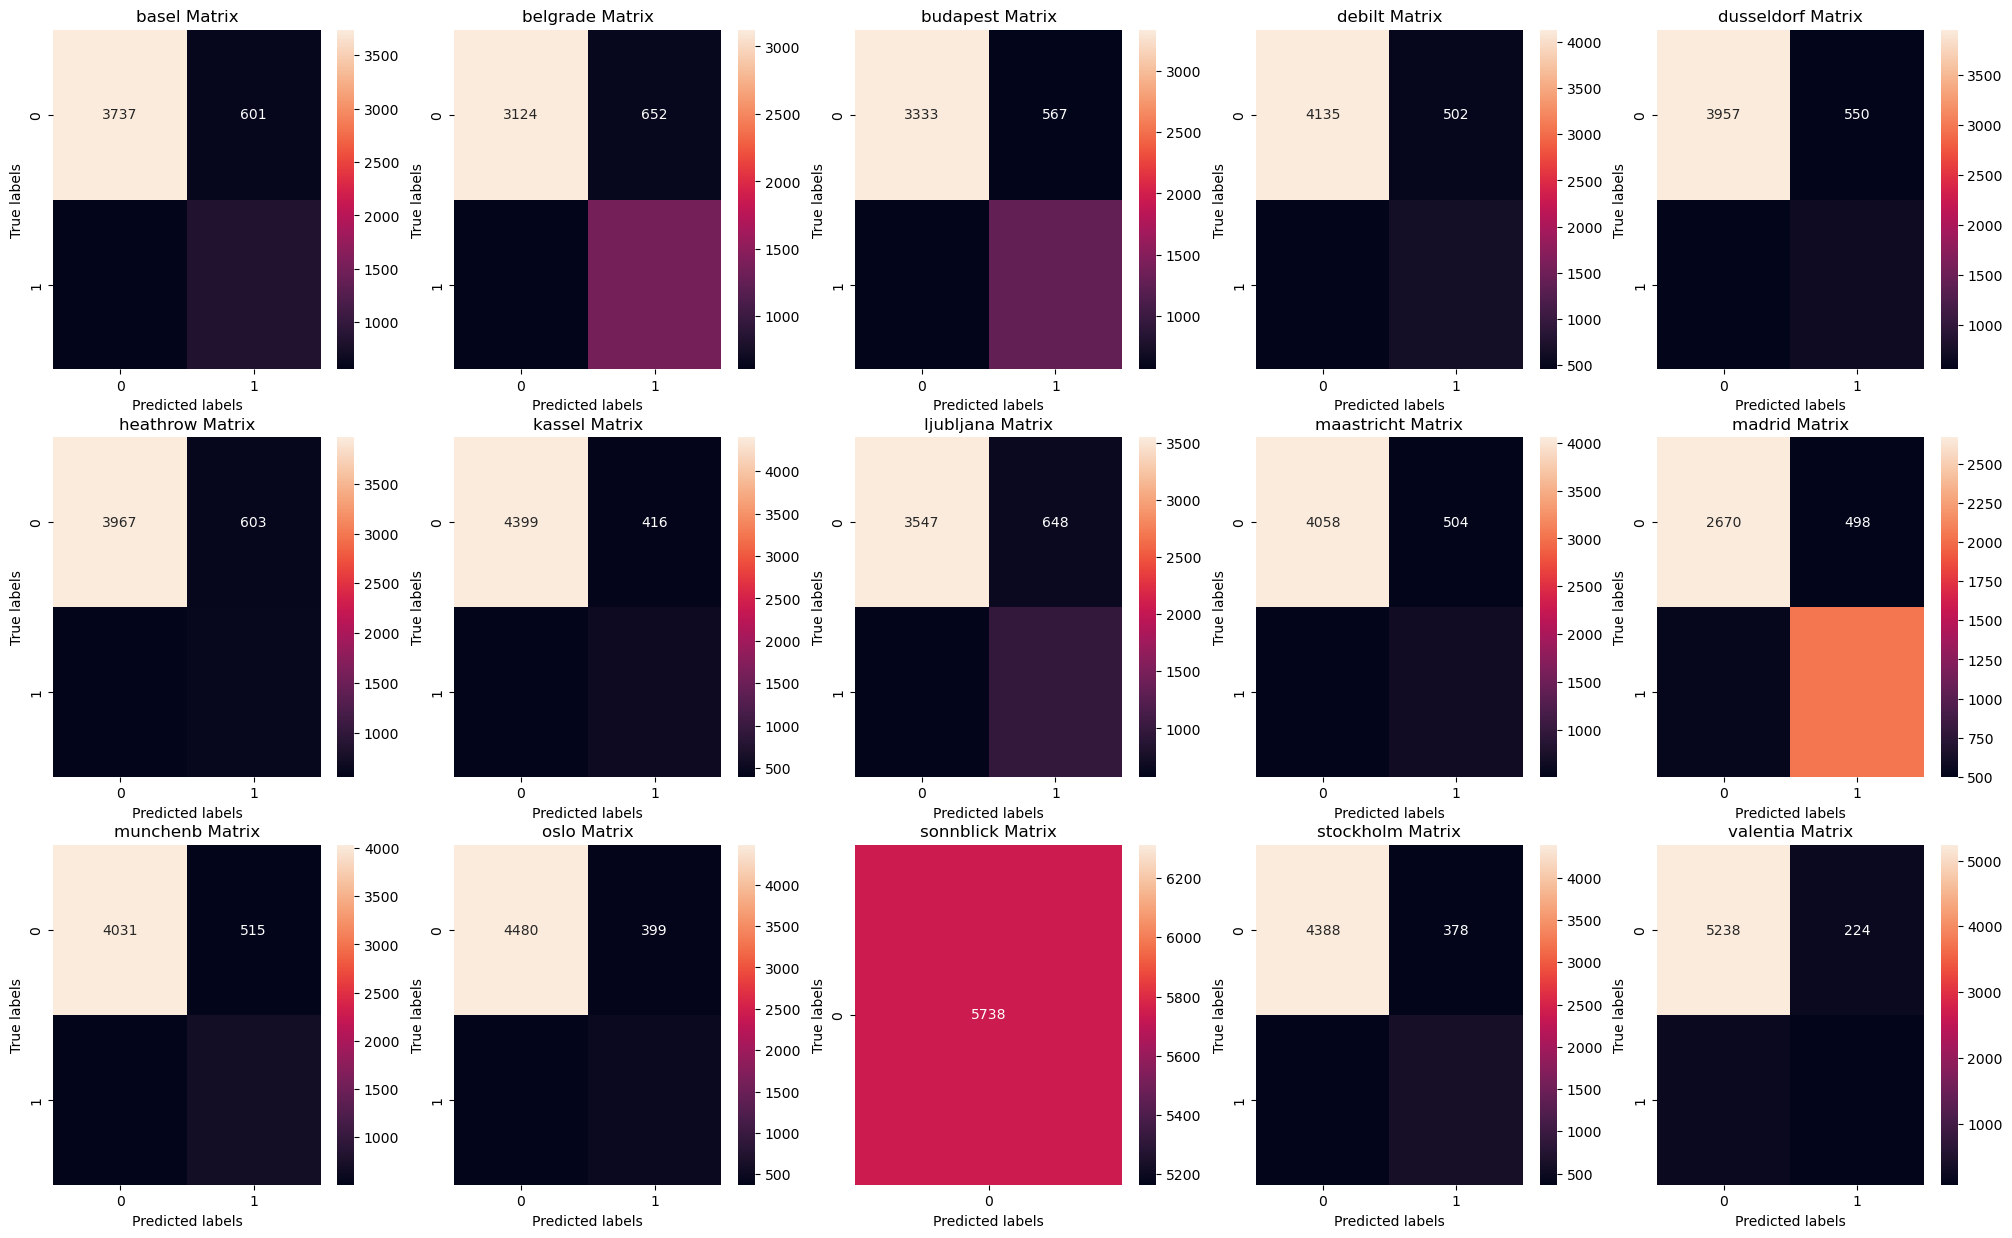

In [73]:
#Confusion matrix based on the last "k" in the sequence (Test data)
locations = list({x.split("_")[0] for x in climate.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_test_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        count+=1